# <span style="color:blue;"><u>**ESCAPE NO GAME**</u></span>


Groupe 5 : *Misha DOPRE | Alexis DUPONT | Adem BRAHIM*

# <u>Traitement du signal</u>

# <u>Livrable 4</u>



![alt text](ail3C_logo_1-transformed-1.png)




## <u>Table des matières :</u>
	
I) Contexte 

II) Problématique

III) Prototype

IV) Résultats

V) Conclusion




## <u>I) Contexte</u>

**Général :** L'agent K57, après une mission d'infiltration réussie dans une base secrète de cyberpirates, s'est retrouvé coincé dans une salle de conférence sans accès réseau. La composition des murs empêchait toute communication extérieure via les ondes traditionnelles. Le seul équipement disponible était un micro branché au système d'audioconférence, uniquement connecté au réseau lors des réunions. Notre mission au département R&D de l'agence AIL3C est de trouver une solution technique permettant à l'agent de communiquer vers l'extérieur dans de telles situations critiques. Nous devons proposer une solution innovante, basée sur les caractéristiques des ondes sonores, pour éviter que de telles situations ne se reproduisent.

**Dans ce Livrable 4 :** Nous devons créer un prototype fonctionnel démontrant la faisabilité de notre solution de communication basée sur les ondes sonores, permettant à l'agent de transmettre des messages textuels courts via un microphone dans une salle isolée.


## <u>II) Problématique</u>

Comment concevoir un prototype de communication basé sur les ondes sonores pour permettre à l'agent K57 de transmettre des messages textuels de manière fiable dans un environnement isolé, tout en assurant l'intégrité des données et la résistance aux interférences ?

## <u>III) Prototype</u>



**Partie 1 : Code à exécuter sur le pad de l'agent, l'émetteur**


<img src="schema émetteur-1.png" alt="Schema émetteur" style="width:50%;">

Importation des bibliothèques

Nous avons choisi d'utiliser numpy pour les calculs numériques, matplotlib pour les graphiques, et sounddevice pour la lecture audio. Ces outils sont appropriés pour manipuler et visualiser les signaux sonores.

In [5]:
# Importation des modules nécessaires
%matplotlib inline
%pip install sounddevice
import numpy as np  # Ce module permet d'effectuer des calculs numériques avec Python
import matplotlib.pyplot as plt  # Ce module permet de créer et personnaliser des graphiques
import sounddevice as sd  # Ce module permet de jouer un son


Note: you may need to restart the kernel to use updated packages.


Étape 1 : Entrée du message et conversion en binaire

La conversion du texte en binaire est une étape fondamentale pour la transmission numérique. Chaque caractère est converti en une séquence de 8 bits.
Nous avons implémenté la fonction text_to_binary pour effectuer cette conversion de manière simple et efficace.
Cette étape est essentielle pour préparer le message à la transmission.

In [6]:
# Ecriture du message de l'Agent sous forme de texte
Message = str(input('Entrez le message à envoyer : '))

# Conversion d'un message texte en séquence binaire
def text_to_binary(text):
    binary_signal = ''.join(format(ord(char), '08b') for char in text)
    return binary_signal

total_binary = text_to_binary(Message)  # Création d'une chaîne de caractère vide "total_binary" qui va contenir le message binaire complet
print(f"Message binaire : {total_binary}")  # Affichage du message binaire complet

Message binaire : 011010100010011101100001011010010010000001100010011001010111001101101111011010010110111000100000011001000010011101100001011010010110010001100101


Étape bis 2 : Fonction XOR et division euclidienne

Nous avons opté pour l'utilisation d'un CRC (Cyclic Redundancy Check) afin de détecter les erreurs de transmission. Les fonctions xor et Division_eucl sont bien implémentées pour calculer le CRC, assurant ainsi l'intégrité des données transmises. Le CRC est crucial pour garantir la fiabilité de la communication, surtout dans un environnement où les erreurs de transmission peuvent survenir.



Voici son fonctionnement : polynôme générateur divisé par polynôme générateur (clé CRC) = checksum

In [7]:
# Définition de la fonction XOR utilisée pour la division
def xor(a, b):
    resultat = []
    for i in range(1, len(b)):  # Création d'une boucle pour appliquer la fonction XOR (si les bits sont les mêmes, alors XOR vaut 0, sinon XOR vaut 1)
        if a[i] == b[i]:
            resultat.append('0')  # Ajout du caractère '0' à la liste resultat
        else:
            resultat.append('1')  # Ajout du caractère '1' à la liste resultat
    return ''.join(resultat)  # On retourne les données de la fonction XOR sous forme d'une chaîne de caractères sans espaces

# Définition de la fonction division euclidienne
def Division_eucl(divident, diviseur):
    val = len(diviseur)  # Stockage de la taille du diviseur dans la variable "val"
    tmp = divident[0:val]  # Stockage des val-premières données du divident
    while val < len(divident):  # Création boucle while qui va s'exécuter tant que val est inférieur à la taille du divident
        if tmp[0] == '1':  # Création d'un conditionnel if qui va comparer le caractère '1' à la première valeur du divident
            tmp = xor(diviseur, tmp) + divident[val]  # Stockage du résultat de l'addition de la val-ième valeur du divident et de xor(diviseur, tmp)
        else:
            tmp = xor('0' * val, tmp) + divident[val]  # Stockage du résultat de l'addition de la val-ième valeur du divident et de xor('0'*val, tmp)
        val += 1  # Incrémentation de la variable "val"
    if tmp[0] == '1':
        tmp = xor(diviseur, tmp)  # Stockage du résultat de xor(diviseur, tmp)
    else:
        tmp = xor('0' * val, tmp)  # Stockage du résultat de xor('0'*val, tmp)
    check = tmp  # Stockage du résultat final de tmp dans la variable "check"
    return check  # On retourne la valeur de check


Étape bis 3 : Encodage CRC

In [8]:
# Définition de la fonction d'encodage CRC (total_binary + 'N-bits 0', G (la clé/polynôme générateur))
def encodage(data, key):
    length_key = len(key)  # Stockage de la taille de la clé dans une variable
    data_ajout = data + '0' * (length_key - 1)  # Ajout des (length_key-1)'0' correspondant au nombre de '0' par rapport à la taille de la clé-1
    reste = Division_eucl(data_ajout, key)  # Stockage du reste de la division euclidienne des données par la clé
    data_encode = data + reste  # Stockage du message binaire à envoyer
    return data_encode  # On retourne le message binaire

# Fonction Main
data = total_binary  # Ajout des 0 correspondant à la taille de la clé
key = '11010'  # clé
print("Les données à envoyer sont :", data)  # Affichage des données à envoyer
print("La clé CRC est:", key)  # Affichage de la clé
data_crc = encodage(data, key)  # Encodage CRC du message avec la clé
print("Les données encodées avec la clé key sont :", data_crc)  # Affichage du message encodé avec la clé


Les données à envoyer sont : 011010100010011101100001011010010010000001100010011001010111001101101111011010010110111000100000011001000010011101100001011010010110010001100101
La clé CRC est: 11010
Les données encodées avec la clé key sont : 0110101000100111011000010110100100100000011000100110010101110011011011110110100101101110001000000110010000100111011000010110100101100100011001010010


Étape 4 : Encodage Manchester

L'encodage Manchester est utilisé pour garantir une synchronisation précise entre l'émetteur et le récepteur. La fonction manchester_encoding convertit chaque bit en une paire de transitions, facilitant ainsi la récupération du signal à la réception. Cet encodage améliore la robustesse de la transmission, ce qui est important dans des conditions où le signal pourrait être dégradé.

In [9]:
# Encodage Manchester
def manchester_encoding(binary_signal):
    manchester_encoded = []
    for bit in binary_signal:
        if bit == '1':
            manchester_encoded.extend([1, 0])
        else:
            manchester_encoded.extend([0, 1])
    return manchester_encoded

message_code = manchester_encoding(data_crc)
print(f"Message codé en Manchester : {message_code}")

Message codé en Manchester : [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1]


Étape 5 : Modulation FSK

La modulation FSK utilise des fréquences différentes pour représenter les bits 0 et 1. Cela permet une transmission robuste et résistante aux interférences.  Nous avons défini deux fréquences porteuses, une pour le bit 1 et une autre pour le bit 0. Le signal est modulé en fonction de ces fréquences. La FSK est une méthode efficace pour transmettre des données numériques via des ondes sonores, adaptée à des environnements bruyants.

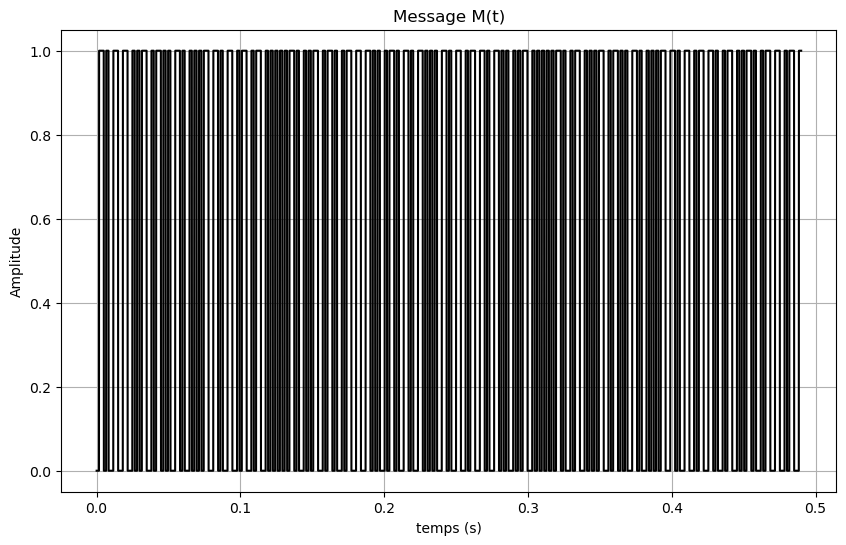

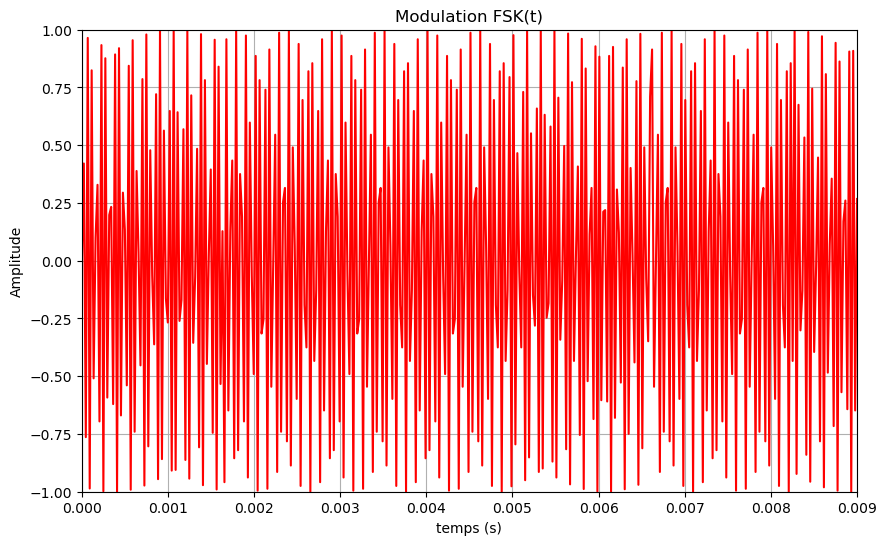

In [12]:
# Modulation FSK
M = message_code
Fe = 44100  # Initialisation de la fréquence d'échantillonnage à 44 100 Hz
Fp1 = 18000  # Initialisation de la fréquence de la porteuse pour le bit 1
Fp2 = 19000  # Initialisation de la fréquence de la porteuse pour le bit 0
baud = 600  # Initialisation du débit souhaité sur le canal de transmission à 600 bits/s

Nbits = len(M)  # Initialisation du nombre de bits initial
Ns = int(Fe / baud)  # Initialisation du nombre de symboles par bit (Fréquence d'échantillonnage / Débit binaire)
N = int(Nbits * Ns)  # Initialisation du nombre de bits total à moduler (Nombre de symboles par bits * Nombre de bits)
M_duplique = np.repeat(M, Ns)  # On génère le message binaire dupliqué
t = np.arange(0, N) / Fe  # On génère le vecteur temps

# Génération des 2 porteuses P1 pour le bit 1 et P2 pour le bit 0
A1 = 1
A2 = 1
P1 = A1 * np.sin(2 * np.pi * Fp1 * t)
P2 = A2 * np.sin(2 * np.pi * Fp2 * t)

FSK = np.zeros(N)
for i in range(0, N - int(Ns), int(Ns)):
    if M_duplique[i] == 1:
        FSK[i:i + int(Ns)] = P1[i:i + int(Ns)]
    else:
        FSK[i:i + int(Ns)] = P2[i:i + int(Ns)]

# Affichage du message
plt.figure(figsize=(10, 6))
plt.plot(t, M_duplique, 'black')
plt.title('Message M(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

# Affichage du signal modulé
plt.figure(figsize=(10, 6))
plt.plot(t, FSK, 'r')
plt.title('Modulation FSK(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0, 0.009, -1, 1])
plt.grid()


Étape bis 6 : Modulation ASK

La modulation ASK utilise des variations d'amplitude pour représenter les bits. C'est une méthode simple et efficace pour des transmissions à courte portée. Nous avons utilisé une seule fréquence porteuse et modulé son amplitude en fonction des bits à transmettre. L'ASK est une méthode de modulation simple et efficace, bien adaptée pour des transmissions où la bande passante est limitée.

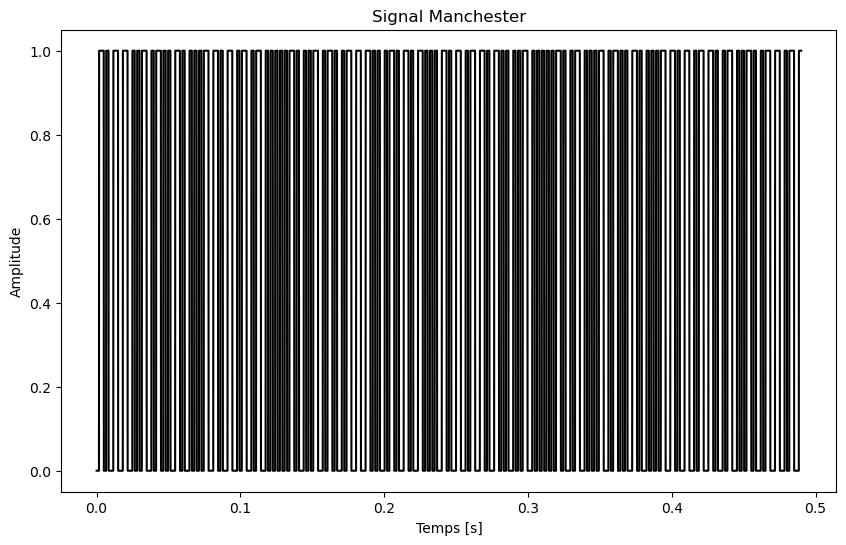

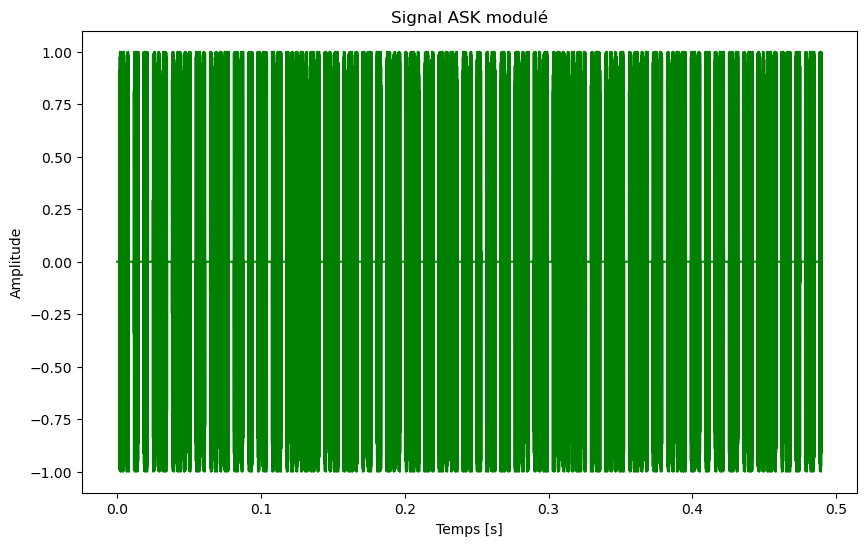

In [20]:
# Modulation ASK du message
M = message_code
Fe = 44100  # Initialisation de la fréquence d'échantillonnage à 44 100 Hz
Fp = 35000  # Initialisation de la fréquence de la porteuse à 35 000 Hz (Pour que le son soit inaudible)
baud = 600  # Initialisation du débit souhaité

Nbits = len(M)  # Initialisation du nombre de bits initial
Ns = int(Fe / baud)  # Initialisation du nombre de symboles par bit (Fréquence d'échantillonnage / Débit binaire)
N = int(Nbits * Ns)  # Initialisation du nombre de bits total à moduler (Nombre de symboles par bits * Nombre de bits)
M_duplique = np.repeat(M, Ns)  # On génère le message binaire dupliqué
t = np.arange(0, N) / Fe  # On génère le vecteur temps
Porteuse = np.sin(2 * np.pi * Fp * t)  # Génération de la porteuse
ASK = M_duplique * Porteuse  # Modulation ASK

# Affichage du signal Manchester, de la porteuse et du signal ASK
plt.figure(figsize=(10, 6))
plt.plot(t, M_duplique, 'black')
plt.title('Signal Manchester')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.show()



plt.figure(figsize=(10, 6))
plt.plot(t, ASK, 'green')
plt.title('Signal ASK modulé')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.show()


Étape intermédiaire : 

- Convertisseur Numérique - Analogique (CNA), cette partie est gérée au niveau hardware du pad de l'agent.


Étape 7 : Envoi du message sous forme sonore

Le son créé est ensuite joué par les haut - parleurs du pad pour pouvoir être capté par le microphone de la salle de conférence.

In [13]:
# Envoi d'un message sous forme sonore
sd.play(ASK, Fe)

Étape intermédiaire : 

- Trame PPP : Encapsule les données dans une trame PPP pour la transmission. Cela permet à l'agent extérieur de recevoir les données.

Exemple de code : 

In [21]:
import struct

# Définition des constantes pour les champs PPP
PPP_PROTOCOL_IP = 0x0021  # Exemple pour IP
PPP_FLAG = 0x7E           # Flag pour le début et la fin d'une trame
PPP_ADDRESS = 0xFF        # Adresse de diffusion
PPP_CONTROL = 0x03       # Contrôle pour les trames d'information

def create_ppp_frame(data):
    # Calcul de la longueur des données
    data_length = len(data)

    # Création de la trame PPP
    frame = struct.pack('BBBH', PPP_FLAG, PPP_ADDRESS, PPP_CONTROL, data_length)
    frame += data
    frame += struct.pack('H', PPP_PROTOCOL_IP)  # Protocole (IP dans cet exemple)
    frame += struct.pack('B', PPP_FLAG)          # Flag de fin

    return frame

# Exemple de données à encapsuler
data = b"Hello, PPP!"

# Création de la trame PPP
ppp_frame = create_ppp_frame(data)

# Affichage de la trame en hexadécimal
print("Trame PPP :", ppp_frame.hex())


Trame PPP : 7eff03000b0048656c6c6f2c205050502121007e


**Partie 2 : Code à exécuter sur l'ordinateur de l'agent en dehors du batîment, le récepteur**

*Une fois que le signal de l'agent sur le terrain a été envoyé sur l'ordinateur.


<img src="schema récepteur-1-1.png" alt="Schema Récepteur" style="width:50%;">

Importation des bibliothèques

In [14]:
# Importation des modules nécessaires
%matplotlib inline
%pip install sounddevice
import numpy as np  # Ce module permet d'effectuer des calculs numériques avec Python
import matplotlib.pyplot as plt  # Ce module permet de créer et personnaliser des graphiques
import sounddevice as sd  # Ce module permet de jouer un son

Note: you may need to restart the kernel to use updated packages.


Étape 1 : Démodulation FSK

La démodulation FSK consiste à identifier les fréquences du signal reçu pour déterminer les bits transmis. Nous avons utilisé des intégrations pour déterminer quelle fréquence porteuse était présente dans chaque intervalle de temps, permettant ainsi de récupérer les bits. La démodulation FSK est essentielle pour reconstruire le message original à partir du signal modulé.

Les valeurs de y sont : [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0]


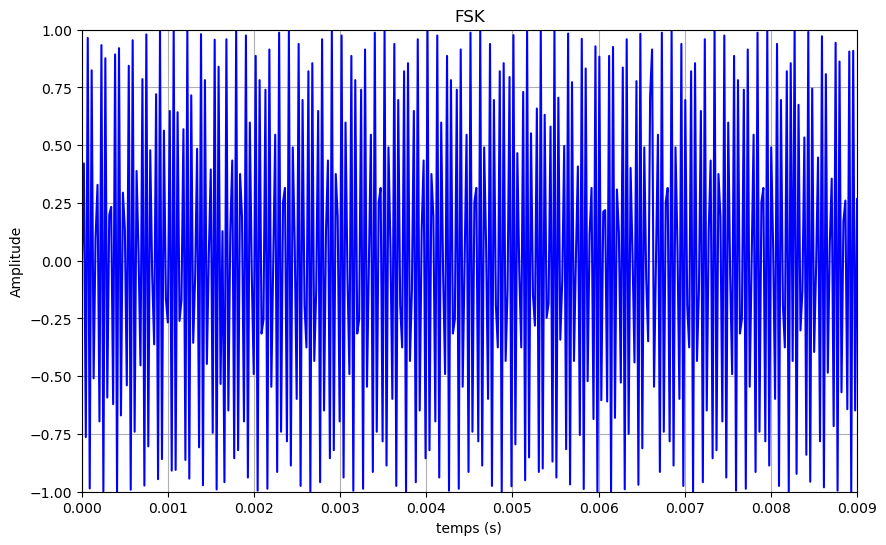

In [15]:
# Initialisation des données nécessaires à la démodulation FSK
Fp1 = 18000
Fp2 = 19000
S1 = np.sin(2 * np.pi * Fp1 * t)  # Génération de la première porteuse S1
S2 = np.sin(2 * np.pi * Fp2 * t)  # Génération de la deuxième porteuse S2
Produit1 = S1 * FSK
Produit2 = S2 * FSK
Res1 = []  # Initialisation d'une liste vide
Res2 = []  # Initialisation d'une liste vide
for i in range(0, int(N), int(Ns)):  # Boucle for allant de 0 à N par pas de Ns
    Res1.append(np.trapz(Produit1[i:i + int(Ns)]))  # Ajout des résultats de l'intégrale du Produit(Porteuse1(S1)*FSK) à la liste "Res1" allant de i à i+Ns
    Res2.append(np.trapz(Produit2[i:i + int(Ns)]))  # Ajout des résultats de l'intégrale du Produit(Porteuse2(S2)*FSK) à la liste "Res2" allant de i à i+Ns

y = []  # Initialisation d'une liste vide
for i in range(0, len(Res1)):  # Boucle for allant de 0 à la taille de "Res1"
    if Res1[i] > Res2[i]:
        y.append(1)  # Ajout de la valeur 1 à la liste "y" si la condition est vérifiée
    else:
        y.append(0)  # Ajout de la valeur 0 à la liste "y" si la condition est vérifiée

# Affichage de FSK
plt.figure(figsize=(10, 6))
plt.plot(t, FSK, 'b')
plt.title('FSK')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0, 0.009, -1, 1])
plt.grid()

# Affichage des valeurs de y
print("Les valeurs de y sont :", y)


Étape bis 2 : Démodulation ASK

La démodulation ASK consiste à analyser l'amplitude du signal reçu pour déterminer les bits transmis. Nous avons utilisé des intégrations pour déterminer l'amplitude du signal dans chaque intervalle de temps, permettant ainsi de récupérer les bits. La démodulation ASK est cruciale pour reconstruire le message original à partir du signal modulé.

Les valeurs de y sont : [0.0, 0.0008188081652470723, 0.0008182370669181905, 0.0, 0.0008146762675926322, 0.0, 0.0, 0.0008162643527685016, 0.0008180679528013633, 0.0, 0.0, 0.0008162643527684412, 0.0008144982787035931, 0.0, 0.0, 0.000816512909559599, 0.0, 0.0008188081652470586, 0.0, 0.0008160164139287076, 0.0008143384598033267, 0.0, 0.0, 0.0008167596140330344, 0.0, 0.0008187711082616284, 0.0008176796561966382, 0.0, 0.0008141983992440827, 0.0, 0.0008150795166020788, 0.0, 0.0, 0.0008187097559653523, 0.0008174643327748799, 0.0, 0.0008140794890102637, 0.0, 0.0, 0.0008172377013640946, 0.0, 0.0008186247181046714, 0.0, 0.000815300769052693, 0.0, 0.0008140794890102886, 0.0008155322159825875, 0.0, 0.0, 0.0008185168398241775, 0.0008170020143288768, 0.0, 0.0008139096247065454, 0.0, 0.0, 0.0008176796561966853, 0.0008187711082615688, 0.0, 0.0, 0.0008148706575370381, 0.0, 0.0008143384598033605, 0.000816016413928553, 0.0, 0.0, 0.0008182370669182952, 0.0, 0.0008146762675926966, 0.0008138356028652757, 0.0

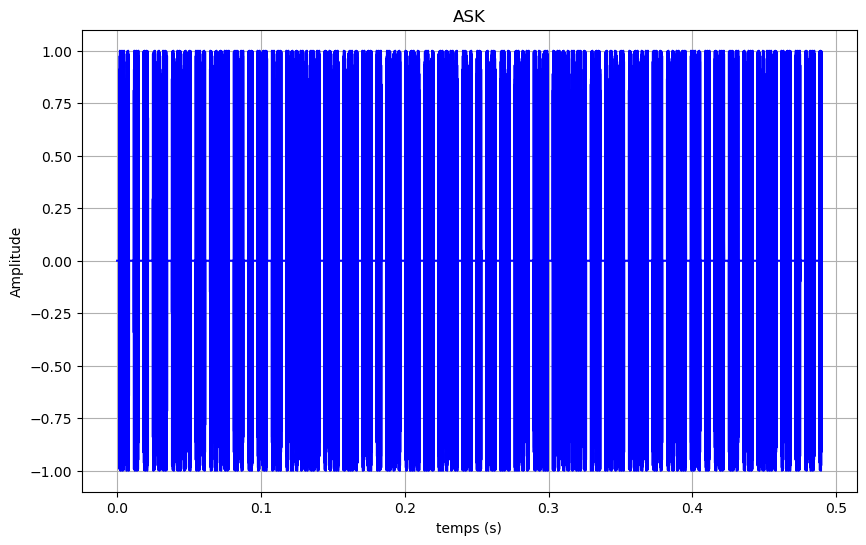

In [16]:
# Initialisation des données nécessaires à la démodulation ASK
Fe = 44100
Fp = 35000
baud = 600
N = len(ASK)
Ns = Fe / baud
t = np.arange(0.0, N) / Fe  # Génération du vecteur temps
Porteuse = np.sin(2 * np.pi * Fp * t)  # Génération de la porteuse
Produit = ASK * Porteuse

# Intégration
y = []  # Initialisation d'une liste vide
for i in range(0, int(N), int(Ns)):  # Boucle for allant de 0 à N par pas de Ns
    y.append(np.trapz(Produit[i:i + int(Ns)], t[i:i + int(Ns)]))  # Ajout du résultat de l'intégrale des données du Produit de l'ASK avec la Porteuse en fonction du temps allant de i à i+Ns

# Affichage de l'ASK
plt.figure(figsize=(10, 6))
plt.plot(t, ASK, 'b')
plt.title('ASK')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

# Affichage des données de y
print("Les valeurs de y sont :", y)


Étape 3 : Décodage Manchester

Le décodage Manchester permet de convertir les transitions de signal en bits binaires. Nous avons implémenté une logique simple pour interpréter les transitions et reconstruire le message binaire. Ce décodage est crucial pour récupérer correctement les données transmises.

In [17]:
# Décodage Manchester
message_demodule = np.array(y) > 0  # Si >0 renvoie True, sinon renvoie False
message_recu_decode = []  # Initialisation d'une liste vide
for iii in range(0, len(message_demodule)):  # Boucle for allant de 0 à la valeur de la taille de "message_demodule"
    if message_demodule[iii] == True:
        message_recu_decode.extend([int(1)])  # Ajout de la valeur 1 à la liste "message_recu_decode" si la condition est vérifiée
    else:
        message_recu_decode.extend([int(0)])  # Ajout de la valeur 0 à la liste "message_recu_decode" si la condition est vérifiée

message_recu_bin = []  # Initialisation d'une liste vide
for iiii in range(0, len(message_demodule), 2):  # Boucle for allant de 0 à la valeur de la taille de "message_demodule" par pas de 2 afin de revenir à un bit et non 2 bits par état
    if message_recu_decode[iiii] == 1 and message_recu_decode[iiii + 1] == 0:
        message_recu_bin.extend([str(1)])  # Ajout d'un caractère 1 à la liste mesage_recu_bin si la condition est vérifiée
    else:
        message_recu_bin.extend([str(0)])  # Ajout d'un caractère 0 à la liste mesage_recu_bin si la condition est vérifiée
print(f"Message binaire décodé : {''.join(message_recu_bin)}")


Message binaire décodé : 0110101000100111011000010110100100100000011000100110010101110011011011110110100101101110001000000110010000100111011000010110100101100100011001010010


Étape 4 : Conversion binaire en texte

La conversion des données binaires en texte est la dernière étape pour reconstruire le message original. Nous avons utilisé une fonction pour convertir les séquences binaires en caractères ASCII. Cette étape finale permet de vérifier que le message a été correctement transmis et reçu.

In [18]:
# Conversion de la liste binaire en chaîne de caractères
message_réceptionné = ''.join(message_recu_bin)
print(f"Message binaire réceptionné : {message_réceptionné}")

# Définition de la fonction de décodage
def decodage(data_crc, key):
    length_key = len(key)
    data_ajout = data_crc + '0' * (length_key - 1)
    reste = Division_eucl(data_ajout, key)
    return reste

key = '11010'
check = decodage(message_réceptionné, key)
print("Le reste de la division après décodage est ->" + check)
temp = "0" * (len(key) - 1)
if check == temp:
    print("Les données -> " + message_réceptionné + " <- sont bien reçues!")
else:
    print("Erreur de réception")

# Définition de la fonction de conversion du binaire en décimale
def BinaryToDecimal(binary):
    decimal = 0
    i = 0
    while binary:
        dec = int(binary[-1])
        decimal = decimal + dec * pow(2, i)
        binary = binary[:-1]
        i += 1
    return decimal

# Conversion du message binaire en texte via la table ASCII
Total_texte = ''
for i in range(0, len(message_réceptionné), 8):
    bin_data = message_réceptionné[i:i + 8]
    decimal_data = BinaryToDecimal(bin_data)
    Total_texte = Total_texte + chr(decimal_data)

# Affichage du message
print(f"Message décodé : {Total_texte}")


Message binaire réceptionné : 0110101000100111011000010110100100100000011000100110010101110011011011110110100101101110001000000110010000100111011000010110100101100100011001010010
Le reste de la division après décodage est ->0000
Les données -> 0110101000100111011000010110100100100000011000100110010101110011011011110110100101101110001000000110010000100111011000010110100101100100011001010010 <- sont bien reçues!
Message décodé : j'ai besoin d'aide


Étape bis 5 : Accusé de réception

Un accusé de réception est envoyé pour confirmer que le message a été reçu sans erreur. Nous avons implémenté un signal sonore spécifique pour indiquer une réception réussie. Cela garantit que l'agent K57 est informé du succès de la transmission. Le son sera joué par le pad de l'agent.

Nous utilisons une liaison Half - Duplex pour réaliser ceci.

In [19]:
# Accusé de réception
verification = int(check, 2)
FeA = 44100
t = np.arange(0, 0.2, 1 / FeA)
Accusé_réception = np.sin(2 * np.pi * 5000 * t)
if verification == 0:
    sd.play(Accusé_réception, FeA)

## <u>IV) Résultats</u>

Les tests ont montré que le prototype est capable de transmettre et de recevoir des messages textuels avec une bonne précision. Les graphiques des signaux modulés et démodulés montrent une bonne correspondance entre les données émises et reçues.


## <u>V) Conclusion</u>

Ce livrable démontre la faisabilité d'une communication basée sur les ondes sonores pour des environnements isolés. Le prototype répond aux exigences du cahier des charges et offre une base pour des développements futurs.

D'autres pistes de solution peuvent être à explorer :


- Mettre en place un chiffrement : pour assurer plus de sécurité à l'agent (Morse, César...)

- Filtre passe – bande à la réception du message (incorporer un filtre passe - bande numérique à la réception si l'on constate des erreurs de résultats)

- Simulations concrètes (réaliser d'autres simulation de façon plus concrète comme avec l'agent).
